Natural Language Processing
針對1000條用戶對飯店的相關評論
找到一個算法來判斷評論是正面還是負面
資料來源:英文
因為更好斷詞(因為中文相對不好斷詞，會更加複雜)
針對評論我們手動加上標籤 1:正面 0:負面
.tsv 檔案是利用tab鍵進行長空格(tab separated)
.csv 檔案是利用coma進行分離(coma separated)
因為英文在寫作的過程中，很常都是使用coma，容易造成不好識別，故使用tsv檔案，因為在寫作過程中很少使用tab鍵

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)
#分隔符號是delimiter，quoting目前還不知道是什麼

In [4]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
# Cleaning the texts
import re

In [6]:
review_test = re.sub('[^a-zA-Z]', ' ', dataset['Review'][0])#只留下英文字，並且利用空格來做分隔

In [8]:
review_test #str

'Wow    Loved this place '

In [10]:
import nltk
nltk.download('stopwords')#下載stopword
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chungen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][0])
review = review.lower()#將review中的大寫都轉換成小寫
review = review.split()#將詞分開
review = [word for word in review if not word in set(stopwords.words('english'))]
#將review中的斷詞拿掉，set()可以加速斷詞搜尋，考慮到未來可能遇到新聞或是書本等大量內容
  

In [12]:
review #list

['wow', 'loved', 'place']

In [13]:
from nltk.stem.porter import PorterStemmer#Porter是編寫函數庫的作者

In [14]:
ps = PorterStemmer()
review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
#ps.stem()取詞根

In [15]:
review

['wow', 'love', 'place']

In [16]:
review = ' '.join(review)#在兩個單詞之間加入空格並且合併

In [17]:
review

'wow love place'

In [18]:
corpus = []#定義空序列，corpus為語料庫
for i in range(0, 1000): #1000不會被包含，故為0-999
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [19]:
review

'wast enough life pour salt wound draw time took bring check'

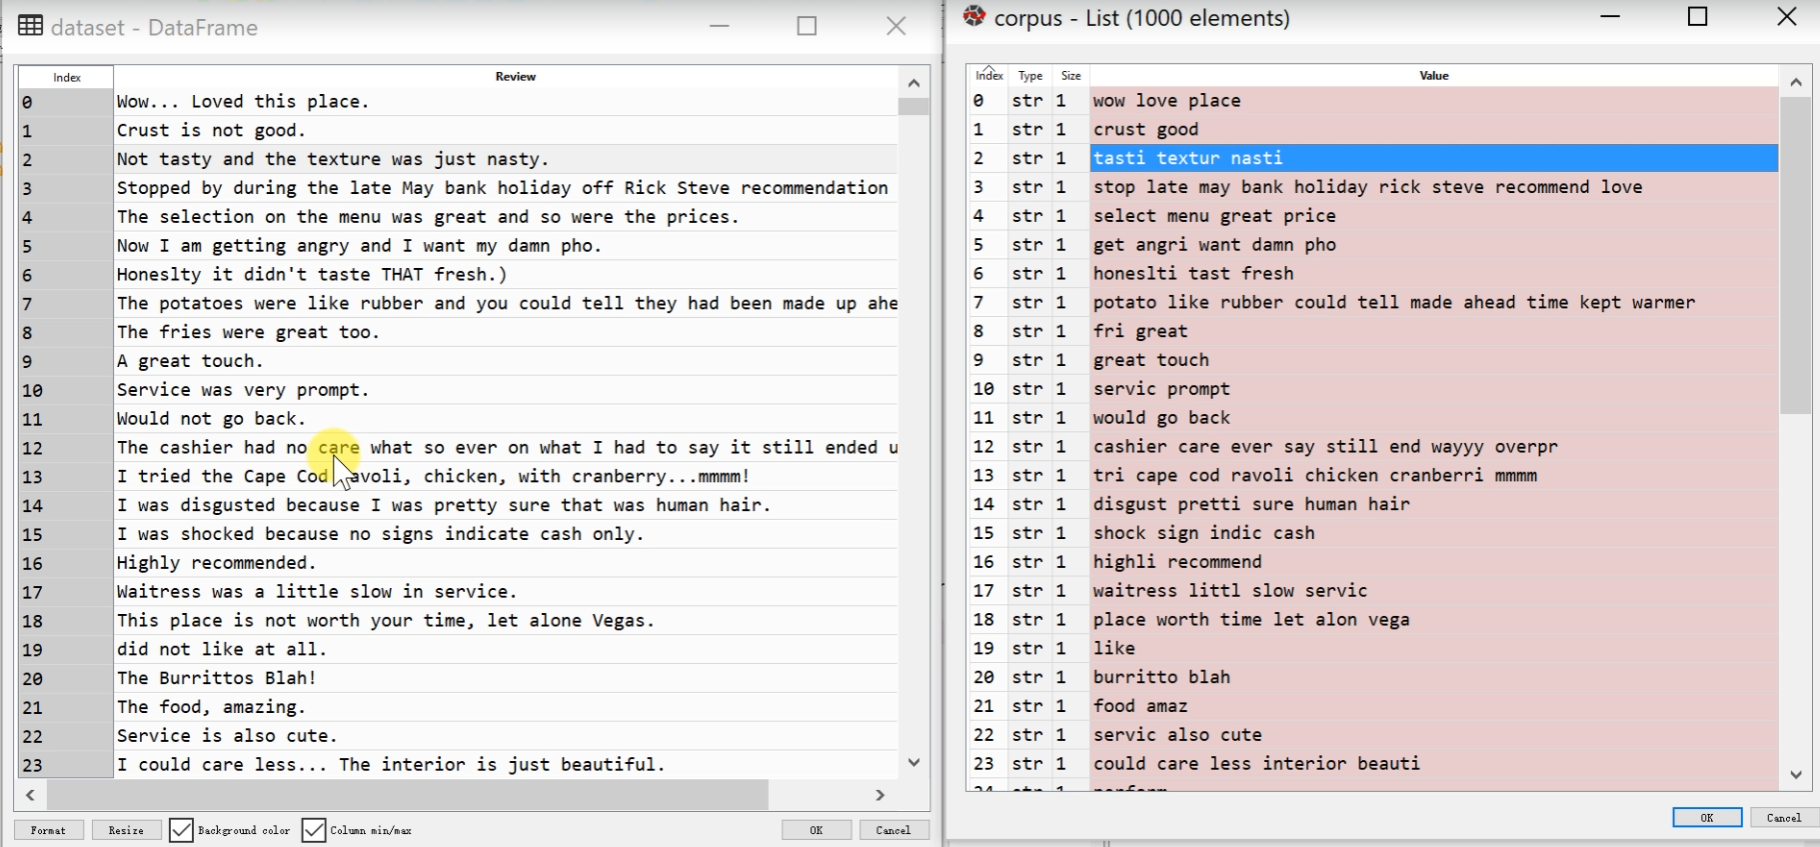

模型的侷限性:因為模型為一維向量，將每個單詞都分開=>會遇到以下問題例如:index 1，將not辨認為虛詞並刪除，會影響自變量。
解決方式=>找尋更完整的函數庫，像是二維向量，將兩個字合併判斷。舉例:not good。

In [21]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
#函數庫有提供多個參數進行調整，有現成的文本清理工具，但手動清理自由度更大
X = cv.fit_transform(corpus).toarray()

In [23]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

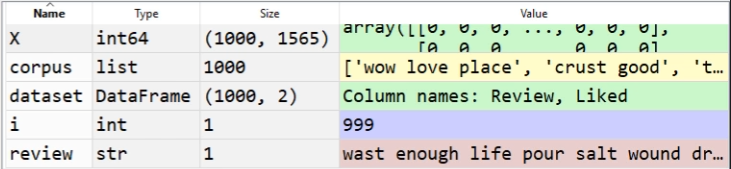

In [24]:
# Creating the Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
#從1565中選擇1500個最常出現的詞語
#函數庫有提供多個參數進行調整，有現成的文本清理工具，但手動清理自由度更大

X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values
#應變量選擇全部的列以及第二行的值
#不視覺化的原因是因為X的維度太大

In [26]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

# Predicting the Test set results
y_predict = regressor.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)   

In [27]:
cm

array([[55, 42],
       [12, 91]], dtype=int64)

In [29]:
(55+91)/(200)

0.73